In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
product = pd.read_csv('../archivos-csv/Production.product.csv', sep=';', decimal=',')
p_category = pd.read_csv('../archivos-csv/Production.productcategory.csv', sep=';', decimal=',')
p_sub_category = pd.read_csv('../archivos-csv/Production.productsubcategory.csv', sep=';', decimal=',')
order_detail = pd.read_csv('../archivos-csv/sales.salesorderdetail.csv',sep=';', decimal=',')
order_header = pd.read_csv('../archivos-csv/sales.salesorderheader.csv',sep=';', decimal=',')
sales_territory = data = pd.read_csv('../archivos-csv/sales.salesterritory.csv',sep=';', decimal=',')
pd.set_option('display.max_columns', None)

## Limpieza, normalizacion de datos, nulos, duplicados. (PRODUCT)

In [4]:
product.shape

(304, 24)

In [83]:
product.head()

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,SizeUnitMeasureCode,WeightUnitMeasureCode,Weight,DaysToManufacture,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,ModifiedDate
0,514,LL Mountain Seat Assembly,SA-M198,True,False,Not Have,500,375,98.77,161.34,NaN,CM,LB,2.93,1,M,L,U,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000000
1,515,ML Mountain Seat Assembly,SA-M237,True,False,Not Have,500,375,108.99,178.04,NaN,CM,LB,2.93,1,M,M,U,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000000
2,516,HL Mountain Seat Assembly,SA-M687,True,False,Not Have,500,375,145.87,238.27,NaN,CM,LB,2.93,1,M,M,U,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000000
3,517,LL Road Seat Assembly,SA-R127,True,False,Not Have,500,375,98.77,161.34,NaN,CM,LB,2.93,1,R,L,U,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000000
4,518,ML Road Seat Assembly,SA-R430,True,False,Not Have,500,375,108.99,178.04,NaN,CM,LB,2.93,1,R,M,U,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000000


In [84]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductID              304 non-null    int64  
 1   Name                   304 non-null    object 
 2   ProductNumber          304 non-null    object 
 3   MakeFlag               304 non-null    bool   
 4   FinishedGoodsFlag      304 non-null    bool   
 5   Color                  304 non-null    object 
 6   SafetyStockLevel       304 non-null    int64  
 7   ReorderPoint           304 non-null    int64  
 8   StandardCost           304 non-null    float64
 9   ListPrice              304 non-null    float64
 10  Size                   211 non-null    object 
 11  SizeUnitMeasureCode    304 non-null    object 
 12  WeightUnitMeasureCode  304 non-null    object 
 13  Weight                 304 non-null    float64
 14  DaysToManufacture      304 non-null    int64  
 15  Produc

Estandarizacion de nombres de columnas

In [85]:
import re

def camel_to_snake(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

product.columns = [camel_to_snake(col) for col in product.columns]

Eliminacion de columnas innecesarias para el analisis.

In [86]:
product.drop(['product_number','size','size_unit_measure_code','weight_unit_measure_code', 'weight','style','modified_date'], axis=1,inplace=True)

In [87]:
product.head()

,product_id,name,make_flag,finished_goods_flag,color,safety_stock_level,reorder_point,standard_cost,list_price,days_to_manufacture,product_line,class,product_subcategory_id,product_model_id,sell_start_date,sell_end_date,discontinued_date
0,514,LL Mountain Seat Assembly,True,False,Not Have,500,375,98.77,161.34,1,M,L,NaN,NaN,2008-04-30 00:00:00,NaN,NaN
1,515,ML Mountain Seat Assembly,True,False,Not Have,500,375,108.99,178.04,1,M,M,NaN,NaN,2008-04-30 00:00:00,NaN,NaN
2,516,HL Mountain Seat Assembly,True,False,Not Have,500,375,145.87,238.27,1,M,M,NaN,NaN,2008-04-30 00:00:00,NaN,NaN
3,517,LL Road Seat Assembly,True,False,Not Have,500,375,98.77,161.34,1,R,L,NaN,NaN,2008-04-30 00:00:00,NaN,NaN
4,518,ML Road Seat Assembly,True,False,Not Have,500,375,108.99,178.04,1,R,M,NaN,NaN,2008-04-30 00:00:00,NaN,NaN


Revisamos si hay datos nulos y datos duplicados

In [88]:
#nulos
for col in product:
    cant_nulos = product[col].isna().sum()
    print(f"La columna {col} posee {cant_nulos} de nulos")

La columna product_id posee 0 de nulos
La columna name posee 0 de nulos
La columna make_flag posee 0 de nulos
La columna finished_goods_flag posee 0 de nulos
La columna color posee 0 de nulos
La columna safety_stock_level posee 0 de nulos
La columna reorder_point posee 0 de nulos
La columna standard_cost posee 0 de nulos
La columna list_price posee 0 de nulos
La columna days_to_manufacture posee 0 de nulos
La columna product_line posee 0 de nulos
La columna class posee 0 de nulos
La columna product_subcategory_id posee 9 de nulos
La columna product_model_id posee 9 de nulos
La columna sell_start_date posee 0 de nulos
La columna sell_end_date posee 206 de nulos
La columna discontinued_date posee 304 de nulos


In [89]:
product['product_subcategory_id'] = product['product_subcategory_id'].fillna(0)  # 0 = Sin subcategoría
product['product_model_id'] = product['product_model_id'].fillna(0)

### Duplicados

In [90]:
product.duplicated().sum()

0

In [91]:
product.duplicated(subset=["product_id", "name"]).sum()

0

In [92]:
product.duplicated(subset=["product_id"]).sum()

0

In [93]:
#pasamos fechas a su tipo de dato correspondiente
columnas = ['sell_start_date','sell_end_date','discontinued_date']
for col in columnas:
    product[col] = pd.to_datetime(product[col])

In [94]:
product.describe()

,product_id,safety_stock_level,reorder_point,standard_cost,list_price,days_to_manufacture,product_subcategory_id,product_model_id,sell_start_date,sell_end_date,discontinued_date
count,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304,98,0
mean,842.03,284.26,213.20,428.74,743.61,1.77,11.93,36.34,2012-06-21 21:23:41.052631552,2013-02-09 23:45:18.367346944,NaT
min,514.00,4.00,3.00,0.86,2.77,0.00,0.00,0.00,2008-04-30 00:00:00,2012-05-29 00:00:00,NaT
25%,771.75,100.00,75.00,37.12,84.69,1.00,2.00,10.00,2011-05-31 00:00:00,2012-05-29 00:00:00,NaT
50%,847.50,500.00,375.00,199.61,408.04,1.00,12.00,26.00,2012-05-30 00:00:00,2013-05-29 00:00:00,NaT
75%,923.25,500.00,375.00,601.74,"1,079.99",4.00,17.00,46.25,2013-05-30 00:00:00,2013-05-29 00:00:00,NaT
max,999.00,500.00,375.00,"2,171.29","3,578.27",4.00,37.00,128.00,2013-05-30 00:00:00,2013-05-29 00:00:00,NaT
std,101.49,219.93,164.95,529.70,876.21,1.59,9.93,34.11,NaN,NaN,NaN


### Filtrado de valores inválidos o extremos
Valores cero o negativos donde no tienen sentido<br>
Outliers que distorsionen análisis, según contexto

In [95]:
product[(product['standard_cost'] < 0) | (product['list_price'] < 0)]

,product_id,name,make_flag,finished_goods_flag,color,safety_stock_level,reorder_point,standard_cost,list_price,days_to_manufacture,product_line,class,product_subcategory_id,product_model_id,sell_start_date,sell_end_date,discontinued_date


Se aprecian outliers pero al ser datos que representan precios, es totalmente valido que haya valores outliers.

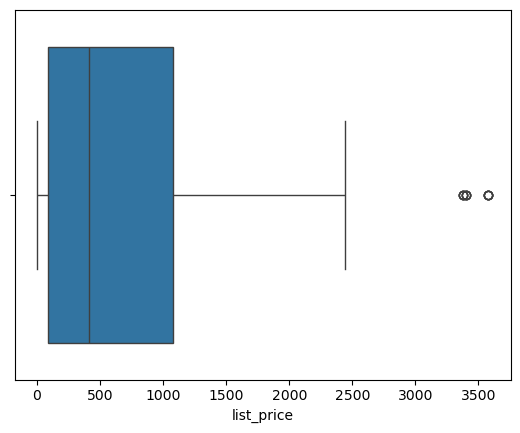

In [96]:
sns.boxplot(x=product['list_price'])
plt.show()

## --------------------------

## Limpieza, normalizacion de datos, nulos, duplicados. (P_CATEGORY)

In [97]:
p_category.shape

(4, 3)

In [98]:
p_category

,ProductCategoryID,Name,ModifiedDate
0,1,Bikes,2008-04-30 00:00:00
1,2,Components,2008-04-30 00:00:00
2,3,Clothing,2008-04-30 00:00:00
3,4,Accessories,2008-04-30 00:00:00


In [99]:
p_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductCategoryID  4 non-null      int64 
 1   Name               4 non-null      object
 2   ModifiedDate       4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


No hace falta eliminar columnas.

Estandarizacion de nombres de columnas

In [100]:
p_category.columns = [camel_to_snake(col) for col in p_category.columns]

Al ser una tabla muy pequeña (4 filas) no hace falta chequear nulos o duplicados porque se observan a la vista ya.

In [101]:
p_category.drop(['modified_date'], axis=1, inplace= True)

## -----------------------

## Limpieza, normalizacion de datos, nulos, duplicados. (P_SUB_CATEGORY)

In [102]:
p_sub_category.shape

(37, 4)

In [103]:
p_sub_category.head()

,ProductSubcategoryID,ProductCategoryID,Name,ModifiedDate
0,1,1,Mountain Bikes,2008-04-30 00:00:00
1,2,1,Road Bikes,2008-04-30 00:00:00
2,3,1,Touring Bikes,2008-04-30 00:00:00
3,4,2,Handlebars,2008-04-30 00:00:00
4,5,2,Bottom Brackets,2008-04-30 00:00:00


In [104]:
p_sub_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ProductSubcategoryID  37 non-null     int64 
 1   ProductCategoryID     37 non-null     int64 
 2   Name                  37 non-null     object
 3   ModifiedDate          37 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


No hace falta eliminar columnas

Estandarizacion de nombres de columas

In [105]:
p_sub_category.columns = [camel_to_snake(col) for col in p_sub_category.columns]

Nulos

In [106]:
for col in p_sub_category:
    cant_nulos = p_sub_category[col].isna().sum()
    print(f'La columna {col} posee {cant_nulos} datos nulos')

La columna product_subcategory_id posee 0 datos nulos
La columna product_category_id posee 0 datos nulos
La columna name posee 0 datos nulos
La columna modified_date posee 0 datos nulos


Duplicados

In [107]:
p_sub_category.duplicated(subset=["product_subcategory_id", "name"]).sum()

0

In [108]:
p_sub_category.duplicated(subset=["product_subcategory_id"]).sum()

0

In [109]:
p_sub_category.duplicated(subset=["product_subcategory_id", 'product_category_id']).sum()

0

In [110]:
p_sub_category.duplicated().sum()

0

In [111]:
p_sub_category.drop(['modified_date'] ,axis=1, inplace=True)

## -----------------------

## Limpieza, normalizacion de datos, nulos, duplicados. (ORDER_DETAIL)

In [112]:
order_detail.shape

(121317, 10)

In [113]:
order_detail.head()

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,"2,024.99",0.00,"2,024.99",2011-05-31 00:00:00
1,43659,2,4911-403C-98,3,777,1,"2,024.99",0.00,"6,074.98",2011-05-31 00:00:00
2,43659,3,4911-403C-98,1,778,1,"2,024.99",0.00,"2,024.99",2011-05-31 00:00:00
3,43659,4,4911-403C-98,1,771,1,"2,039.99",0.00,"2,039.99",2011-05-31 00:00:00
4,43659,5,4911-403C-98,1,772,1,"2,039.99",0.00,"2,039.99",2011-05-31 00:00:00


In [114]:
order_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SalesOrderID           121317 non-null  int64  
 1   SalesOrderDetailID     121317 non-null  int64  
 2   CarrierTrackingNumber  60919 non-null   object 
 3   OrderQty               121317 non-null  int64  
 4   ProductID              121317 non-null  int64  
 5   SpecialOfferID         121317 non-null  int64  
 6   UnitPrice              121317 non-null  float64
 7   UnitPriceDiscount      121317 non-null  float64
 8   LineTotal              121317 non-null  float64
 9   ModifiedDate           121317 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 9.3+ MB


In [115]:
order_detail.describe()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal
count,"121,317.00","121,317.00","121,317.00","121,317.00","121,317.00","121,317.00","121,317.00","121,317.00"
mean,"57,827.36","60,659.00",2.27,841.68,1.16,465.09,0.00,905.45
std,"9,009.15","35,021.35",2.49,86.45,1.22,751.89,0.02,"1,693.42"
min,"43,659.00",1.00,1.00,707.00,1.00,1.33,0.00,1.37
25%,"49,884.00","30,330.00",1.00,768.00,1.00,21.49,0.00,24.99
50%,"57,029.00","60,659.00",1.00,863.00,1.00,49.99,0.00,134.98
75%,"65,490.00","90,988.00",3.00,921.00,1.00,602.35,0.00,"1,120.49"
max,"75,123.00","121,317.00",44.00,999.00,16.00,"3,578.27",0.40,"27,893.62"


In [116]:
order_detail.columns = [camel_to_snake(col) for col in order_detail.columns]

In [117]:
order_detail.drop(['carrier_tracking_number','modified_date'], axis= 1, inplace= True)

In [118]:
order_detail.duplicated().sum()

0

In [119]:
order_detail.duplicated(subset=['sales_order_id', 'sales_order_detail_id']).sum() 

0

In [120]:
order_detail.duplicated(subset=['sales_order_detail_id']).sum() 

0

In [121]:
for col in order_detail:
    cant_nulos = order_detail[col].isna().sum()
    print(f'La cantidad de duplicados en la columna {col} son de {cant_nulos}')

La cantidad de duplicados en la columna sales_order_id son de 0
La cantidad de duplicados en la columna sales_order_detail_id son de 0
La cantidad de duplicados en la columna order_qty son de 0
La cantidad de duplicados en la columna product_id son de 0
La cantidad de duplicados en la columna special_offer_id son de 0
La cantidad de duplicados en la columna unit_price son de 0
La cantidad de duplicados en la columna unit_price_discount son de 0
La cantidad de duplicados en la columna line_total son de 0


In [122]:
order_detail[(order_detail['order_qty']<0) | (order_detail['unit_price']<0) ]

,sales_order_id,sales_order_detail_id,order_qty,product_id,special_offer_id,unit_price,unit_price_discount,line_total


## -----------------------

## Limpieza, normalizacion de datos, nulos, duplicados. (ORDER_HEADER)

In [123]:
order_header.shape

(31465, 24)

In [124]:
order_header.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,CustomerID,SalesPersonID,TerritoryID,BillToAddressID,ShipToAddressID,ShipMethodID,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,ModifiedDate
0,43659,8,2011-05-31 00:00:00,2011-06-12 00:00:00,2011-06-07 00:00:00,5,False,SO43659,PO522145787,10-4020-000676,29825,279.00,5,985,985,5,"16,281.00",105041Vi84182,NaN,"20,565.62","1,971.51",616.10,"23,153.23",2011-06-07 00:00:00
1,43660,8,2011-05-31 00:00:00,2011-06-12 00:00:00,2011-06-07 00:00:00,5,False,SO43660,PO18850127500,10-4020-000117,29672,279.00,5,921,921,5,"5,618.00",115213Vi29411,NaN,"1,294.25",124.25,38.83,"1,457.33",2011-06-07 00:00:00
2,43661,8,2011-05-31 00:00:00,2011-06-12 00:00:00,2011-06-07 00:00:00,5,False,SO43661,PO18473189620,10-4020-000442,29734,282.00,6,517,517,5,"1,346.00",85274Vi6854,4.00,"32,726.48","3,153.77",985.55,"36,865.80",2011-06-07 00:00:00
3,43662,8,2011-05-31 00:00:00,2011-06-12 00:00:00,2011-06-07 00:00:00,5,False,SO43662,PO18444174044,10-4020-000227,29994,282.00,6,482,482,5,"10,456.00",125295Vi53935,4.00,"28,832.53","2,775.16",867.24,"32,474.93",2011-06-07 00:00:00
4,43663,8,2011-05-31 00:00:00,2011-06-12 00:00:00,2011-06-07 00:00:00,5,False,SO43663,PO18009186470,10-4020-000510,29565,276.00,4,1073,1073,5,"4,322.00",45303Vi22691,NaN,419.46,40.27,12.58,472.31,2011-06-07 00:00:00


In [125]:
order_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SalesOrderID            31465 non-null  int64  
 1   RevisionNumber          31465 non-null  int64  
 2   OrderDate               31465 non-null  object 
 3   DueDate                 31465 non-null  object 
 4   ShipDate                31465 non-null  object 
 5   Status                  31465 non-null  int64  
 6   OnlineOrderFlag         31465 non-null  bool   
 7   SalesOrderNumber        31465 non-null  object 
 8   PurchaseOrderNumber     3806 non-null   object 
 9   AccountNumber           31465 non-null  object 
 10  CustomerID              31465 non-null  int64  
 11  SalesPersonID           3806 non-null   float64
 12  TerritoryID             31465 non-null  int64  
 13  BillToAddressID         31465 non-null  int64  
 14  ShipToAddressID         31465 non-null

In [126]:
order_header.columns = [camel_to_snake(col) for col in order_header.columns]

In [127]:
order_header.drop(['sales_order_number','purchase_order_number','account_number','customer_id',
                  'sales_person_id','bill_to_address_id','ship_to_address_id','ship_method_id',
                  'credit_card_id','credit_card_approval_code','currency_rate_id','modified_date'], axis= 1, inplace= True)

Nulos

In [128]:
for col in order_header:
    cant_nulos = order_header[col].isna().sum()
    print(f'La cantidad de duplicados en la columna {col} son de {cant_nulos}')

La cantidad de duplicados en la columna sales_order_id son de 0
La cantidad de duplicados en la columna revision_number son de 0
La cantidad de duplicados en la columna order_date son de 0
La cantidad de duplicados en la columna due_date son de 0
La cantidad de duplicados en la columna ship_date son de 0
La cantidad de duplicados en la columna status son de 0
La cantidad de duplicados en la columna online_order_flag son de 0
La cantidad de duplicados en la columna territory_id son de 0
La cantidad de duplicados en la columna sub_total son de 0
La cantidad de duplicados en la columna tax_amt son de 0
La cantidad de duplicados en la columna freight son de 0
La cantidad de duplicados en la columna total_due son de 0


In [129]:
order_header.duplicated().sum()

0

In [130]:
order_header.duplicated(subset=['sales_order_id']).sum() 

0

In [131]:
order_header.duplicated(subset=['sales_order_id','territory_id']).sum() 

0

In [132]:
columnas1 = ['order_date','due_date','ship_date']
for col in columnas1:
    order_header[col] = pd.to_datetime(order_header[col])

## -----------------------

## Limpieza, normalizacion de datos, nulos, duplicados. (SALES_TERRITORY)

In [133]:
sales_territory

,TerritoryID,Name,CountryRegionCode,Group,SalesYTD,SalesLastYear,CostYTD,CostLastYear,ModifiedDate
0,1,Northwest,US,North America,"7,887,186.79","3,298,694.49",0,0,2008-04-30 00:00:00
1,2,Northeast,US,North America,"2,402,176.85","3,607,148.94",0,0,2008-04-30 00:00:00
2,3,Central,US,North America,"3,072,175.12","3,205,014.08",0,0,2008-04-30 00:00:00
3,4,Southwest,US,North America,"10,510,853.87","5,366,575.71",0,0,2008-04-30 00:00:00
4,5,Southeast,US,North America,"2,538,667.25","3,925,071.43",0,0,2008-04-30 00:00:00
5,6,Canada,CA,North America,"6,771,829.14","5,693,988.86",0,0,2008-04-30 00:00:00
6,7,France,FR,Europe,"4,772,398.31","2,396,539.76",0,0,2008-04-30 00:00:00
7,8,Germany,DE,Europe,"3,805,202.35","1,307,949.79",0,0,2008-04-30 00:00:00
8,9,Australia,AU,Pacific,"5,977,814.92","2,278,548.98",0,0,2008-04-30 00:00:00
9,10,United Kingdom,GB,Europe,"5,012,905.37","1,635,823.40",0,0,2008-04-30 00:00:00


In [134]:
sales_territory.describe()

,TerritoryID,SalesYTD,SalesLastYear,CostYTD,CostLastYear
count,10.00,10.00,10.00,10.00,10.00
mean,5.50,"5,275,121.00","3,271,535.54",0.00,0.00
std,3.03,"2,582,995.81","1,456,222.08",0.00,0.00
min,1.00,"2,402,176.85","1,307,949.79",0.00,0.00
25%,3.25,"3,255,431.93","2,308,046.67",0.00,0.00
50%,5.50,"4,892,651.84","3,251,854.29",0.00,0.00
75%,7.75,"6,573,325.58","3,845,590.81",0.00,0.00
max,10.00,"10,510,853.87","5,693,988.86",0.00,0.00


In [135]:
sales_territory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TerritoryID        10 non-null     int64  
 1   Name               10 non-null     object 
 2   CountryRegionCode  10 non-null     object 
 3   Group              10 non-null     object 
 4   SalesYTD           10 non-null     float64
 5   SalesLastYear      10 non-null     float64
 6   CostYTD            10 non-null     int64  
 7   CostLastYear       10 non-null     int64  
 8   ModifiedDate       10 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 852.0+ bytes


In [136]:
sales_territory.columns = [camel_to_snake(col) for col in sales_territory.columns]

In [137]:
#nulos
for col in sales_territory:
    cant_nulos = sales_territory[col].isna().sum()
    print(f"La columna {col} posee {cant_nulos} de nulos")

La columna territory_id posee 0 de nulos
La columna name posee 0 de nulos
La columna country_region_code posee 0 de nulos
La columna group posee 0 de nulos
La columna sales_ytd posee 0 de nulos
La columna sales_last_year posee 0 de nulos
La columna cost_ytd posee 0 de nulos
La columna cost_last_year posee 0 de nulos
La columna modified_date posee 0 de nulos


In [138]:
sales_territory.duplicated().sum()

0

In [139]:
sales_territory.duplicated(subset=['territory_id']).sum()

0

In [140]:
sales_territory.duplicated(subset=['territory_id','name']).sum()

0

In [141]:
sales_territory.drop(['modified_date','cost_ytd','cost_last_year'], axis=1, inplace= True)

## -----------------------

# ANALISIS DE DATOS

A continuacion se realizara un analisis de ventas utilizando algunos datasets extraidos de adventureworks

Preguntas a responder:

📊 Preguntas de análisis de ventas (AdventureWorks)

¿Cuál es el total de ventas por año/mes? (tendencias en el tiempo)      ✔️

¿Cuáles son los productos más vendidos (unidades y facturación)?        ✔️

¿Qué categorías o subcategorías generan más ingresos?                   ✔️

¿Cómo se distribuyen las ventas por territorio o región?                ✔️

¿Cuál es el margen de ganancia por producto (ListPrice – StandardCost)? ✔️

¿Hay estacionalidad? (picos de ventas en ciertos meses)                 ✔️

¿Qué productos casi no se venden (ventas bajas)?                        ✔️   

¿Qué territorios tienen ventas altas pero baja rentabilidad?            ✔️ 

Productos más rentables vs más vendidos → a veces lo más vendido no es lo que deja más margen. ✔️

### --------------------------------------------------------------------------------

calcula la ganancia bruta de la empresa por mes y año (tendencias en el tiempo) (ganancia bruta)

In [142]:
pd.set_option("display.float_format", "{:,.2f}".format)  # 2 decimales fijos

In [143]:
order_header['Año'] = order_header['order_date'].dt.year
order_header['Mes'] = order_header['order_date'].dt.month

order_header['month_name'] = order_header['order_date'].dt.month_name()

primer_join = order_detail[['sales_order_id','sales_order_detail_id','product_id','order_qty','line_total']].merge(product[['product_id','standard_cost']], on='product_id', how='inner')

primer_join['costo_linea'] = primer_join['order_qty'] * primer_join['standard_cost']

costos_por_orden = primer_join.groupby('sales_order_id')['costo_linea'].sum()

ganancia_por_orden = order_header[['sales_order_id','sub_total','Año','Mes','month_name']].merge(costos_por_orden, on='sales_order_id', how='inner')

#ganancia bruta
ganancia_por_orden['ganancia_bruta'] = ganancia_por_orden['sub_total'] - ganancia_por_orden['costo_linea']

In [144]:
ventas_mes_bruta = ganancia_por_orden.groupby(['Año','month_name'])['ganancia_bruta'].sum().reset_index().sort_values('Año')
ventas_mes_bruta

,Año,month_name,ganancia_bruta
0,2011,August,"213,054.27"
1,2011,December,"237,267.25"
2,2011,July,"228,949.12"
3,2011,June,"183,781.26"
4,2011,May,"3,705.66"
5,2011,November,"294,138.89"
6,2011,October,"265,813.04"
7,2011,September,"200,136.36"
19,2012,September,"19,112.45"
17,2012,November,"144,957.76"


In [145]:
ventas_año_bruto = ganancia_por_orden.groupby('Año')['ganancia_bruta'].sum().reset_index()
ventas_año_bruto['Año'] = ventas_año_bruto['Año'].astype(str)
ventas_año_bruto

,Año,ganancia_bruta
0,2011,"1,626,845.84"
1,2012,"948,201.19"
2,2013,"3,354,362.93"
3,2014,"3,442,493.66"


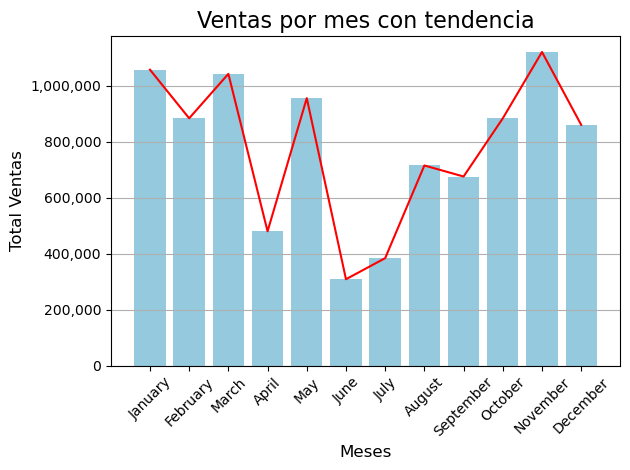

In [146]:
#tambien sirve para demostrar estacionabilidad
import matplotlib.ticker as mtick

ganancia_mes_ordenado = ganancia_por_orden.groupby(['month_name','Mes'])['ganancia_bruta'].sum().reset_index().sort_values('Mes', ascending=True)

sns.barplot(data=ganancia_mes_ordenado, x='month_name', y='ganancia_bruta', color='skyblue')

sns.lineplot(data=ganancia_mes_ordenado, x='month_name', y='ganancia_bruta', color='red')

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title('Ventas por mes con tendencia', fontsize=16)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Total Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

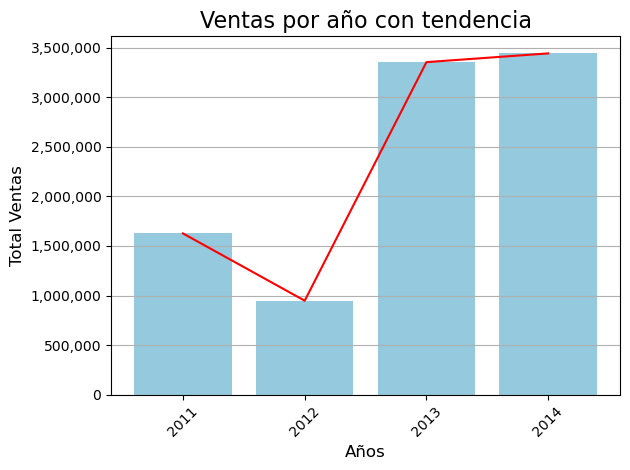

In [147]:

sns.barplot(data=ventas_año_bruto, x='Año', y='ganancia_bruta', color='skyblue')

sns.lineplot(data=ventas_año_bruto, x='Año', y='ganancia_bruta', color='red')

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title('Ventas por año con tendencia', fontsize=16)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Total Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

¿Cuál es el total de ventas por año/mes? (tendencias en el tiempo)

In [148]:
#order_header.head()
cant_ventas_mes = ganancia_por_orden.groupby(['Mes','month_name'])['sales_order_id'].count().reset_index().sort_values('Mes')
cant_ventas_mes

,Mes,month_name,sales_order_id
0,1,January,2877
1,2,February,2300
2,3,March,3144
3,4,April,2812
4,5,May,3175
5,6,June,2189
6,7,July,2356
7,8,August,2324
8,9,September,2300
9,10,October,2616


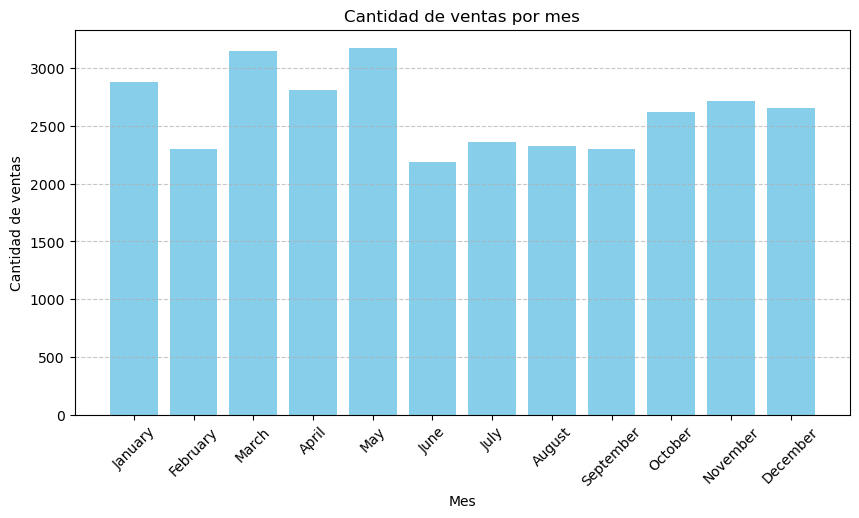

In [149]:
plt.figure(figsize=(10,5))
plt.bar(cant_ventas_mes['month_name'], cant_ventas_mes['sales_order_id'], color='skyblue')
plt.title('Cantidad de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)  # gira los nombres de los meses
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [150]:
cant_ventas_año = ganancia_por_orden.groupby('Año')['sales_order_id'].count().reset_index()
cant_ventas_año['Año'] = cant_ventas_año['Año'].astype(str)
cant_ventas_año

,Año,sales_order_id
0,2011,1607
1,2012,3915
2,2013,14182
3,2014,11761


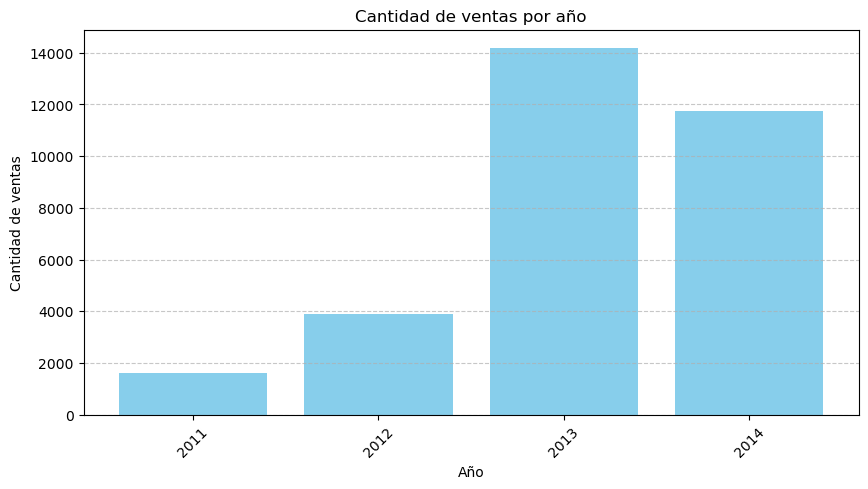

In [151]:
plt.figure(figsize=(10,5))
plt.bar(cant_ventas_año['Año'], cant_ventas_año['sales_order_id'], color='skyblue')
plt.title('Cantidad de ventas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)  # gira los nombres de los meses
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

¿Cuáles son los productos más vendidos (unidades y facturación)?

In [152]:
productos_vendidos = product[['product_id','name']].merge(order_detail[['product_id','sales_order_id','order_qty']], on='product_id', how='inner')

cant_productos_vendidos = productos_vendidos.groupby(['product_id','name'])['order_qty'].sum().reset_index().sort_values('order_qty', ascending=False)
cant_productos_vendidos.head()

,product_id,name,order_qty
5,712,AWC Logo Cap,8311
139,870,Water Bottle - 30 oz.,6815
4,711,"Sport-100 Helmet, Blue",6743
8,715,"Long-Sleeve Logo Jersey, L",6592
1,708,"Sport-100 Helmet, Black",6532


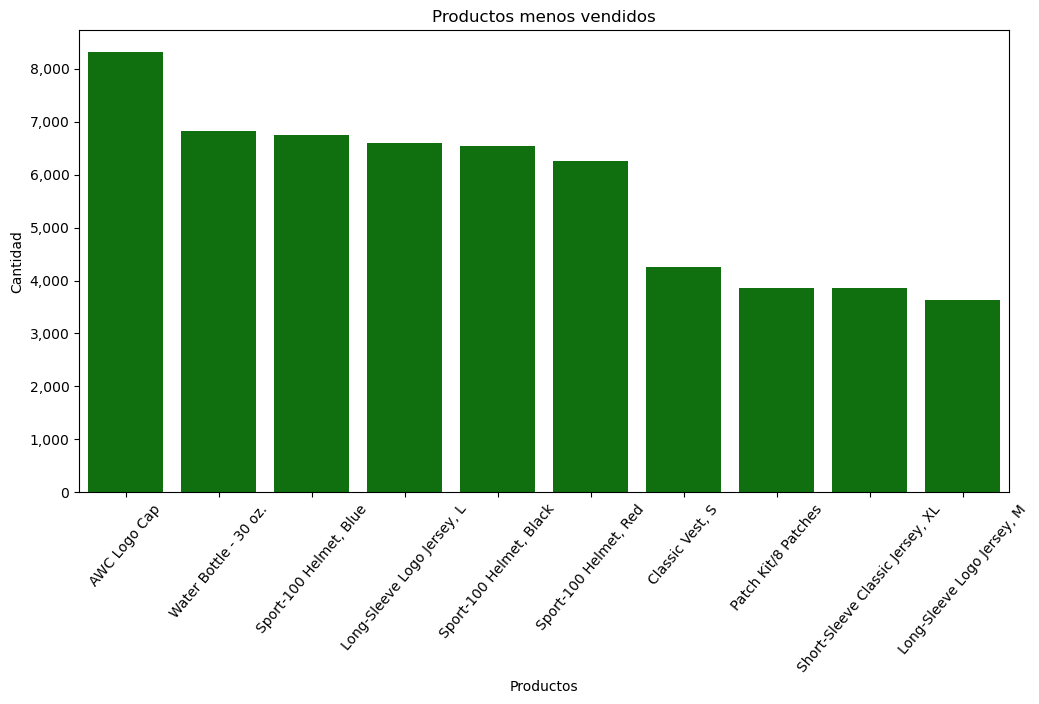

In [153]:
plt.figure(figsize=(12,6))
sns.barplot(data=cant_productos_vendidos.head(10), x='name', y='order_qty', color='green')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Productos mas vendidos')
plt.xlabel('Productos')
plt.ylabel('Cantidad')
plt.xticks(rotation=50)
plt.show()


Producto que deja mas margen.

In [174]:
ganancia_productos = ganancia_por_orden.merge(order_detail[['sales_order_id','product_id','line_total']], on='sales_order_id', how='inner')

#calculamos margen
ganancia_productos = ganancia_productos.groupby('product_id').agg({
    'line_total':'sum',       # esto es el ingreso por producto
    'ganancia_bruta':'sum'     # y esto es la ganancia neta asociada
}).reset_index()

ganancia_productos['margen'] = ganancia_productos['ganancia_bruta'] / ganancia_productos['line_total']

ganancia_productos = ganancia_productos.merge(
    product[['product_id','name']], 
    on='product_id', 
    how='left'
)


ganancia_productos.sort_values('ganancia_bruta', ascending=False, inplace=True)

ganancia_productos.head()

,product_id,line_total,ganancia_bruta,margen,name
65,782,"4,400,592.80","1,747,157.43",0.40,"Mountain-200 Black, 38"
62,779,"3,693,678.03","1,713,951.76",0.46,"Mountain-200 Silver, 38"
67,784,"3,309,673.22","1,708,339.72",0.52,"Mountain-200 Black, 46"
66,783,"4,009,494.76","1,708,054.16",0.43,"Mountain-200 Black, 42"
63,780,"3,438,478.86","1,650,951.07",0.48,"Mountain-200 Silver, 42"


¿Qué categorías o subcategorías generan más ingresos?

In [175]:
prod_categorias = product[['product_id','name','product_subcategory_id']].merge(
                  p_sub_category[['product_subcategory_id','name','product_category_id']], on='product_subcategory_id', how='inner').merge(
                  p_category[['product_category_id','name']], on='product_category_id', how='inner')

prod_categorias.rename(columns={'name_x':'producto',
                                'name_y':'sub_categoria',
                                'name':'categoria'}, inplace=True)

ventas = order_detail[['sales_order_id','product_id','order_qty','line_total']].merge(
         order_header[['sales_order_id','sub_total']], on='sales_order_id', how='inner').merge(
         prod_categorias[['product_id','categoria','sub_categoria']], on='product_id', how='inner')

ingresos_cat = ventas.groupby('categoria')['line_total'].sum().reset_index().sort_values('line_total', ascending=False)
ingresos_cat.head()
ingresos_subcat = ventas.groupby('sub_categoria')['line_total'].sum().reset_index().sort_values('line_total', ascending=False)
ingresos_subcat
#ingresos_cat.head()

,sub_categoria,line_total
24,Road Bikes,"43,909,437.51"
20,Mountain Bikes,"36,445,443.94"
31,Touring Bikes,"14,296,291.26"
21,Mountain Frames,"4,713,930.23"
25,Road Frames,"3,851,350.60"
32,Touring Frames,"1,642,327.69"
18,Jerseys,"752,259.39"
34,Wheels,"680,831.35"
16,Helmets,"484,048.53"
27,Shorts,"413,600.51"


Margen de ganancia:

In [156]:
margen = product[['product_id','name','list_price','standard_cost']].copy()
margen['margen_unitario'] = margen['list_price'] - margen['standard_cost']
margen['margen_porcentaje'] = (margen['margen_unitario'] / margen['list_price'] ) * 100

margen

,product_id,name,list_price,standard_cost,margen_unitario,margen_porcentaje
0,514,LL Mountain Seat Assembly,161.34,98.77,62.57,38.78
1,515,ML Mountain Seat Assembly,178.04,108.99,69.05,38.78
2,516,HL Mountain Seat Assembly,238.27,145.87,92.40,38.78
3,517,LL Road Seat Assembly,161.34,98.77,62.57,38.78
4,518,ML Road Seat Assembly,178.04,108.99,69.05,38.78
...,...,...,...,...,...,...
299,995,ML Bottom Bracket,122.50,44.95,77.55,63.31
300,996,HL Bottom Bracket,147.00,53.94,93.06,63.31
301,997,"Road-750 Black, 44",539.99,343.65,196.34,36.36
302,998,"Road-750 Black, 48",539.99,343.65,196.34,36.36


¿Cómo se distribuyen las ventas por territorio o región?

In [157]:
ventas_generales_region = sales_territory.groupby('country_region_code')['sales_ytd'].sum().reset_index().sort_values('sales_ytd', ascending= False)
ventas_generales_region

,country_region_code,sales_ytd
5,US,"26,411,059.88"
1,CA,"6,771,829.14"
0,AU,"5,977,814.92"
4,GB,"5,012,905.37"
3,FR,"4,772,398.31"
2,DE,"3,805,202.35"


Ahora por zona de cada pais dentro de cada region 

In [158]:
sales_territory[['name','country_region_code','sales_ytd']].sort_values('sales_ytd', ascending= False)

,name,country_region_code,sales_ytd
3,Southwest,US,"10,510,853.87"
0,Northwest,US,"7,887,186.79"
5,Canada,CA,"6,771,829.14"
8,Australia,AU,"5,977,814.92"
9,United Kingdom,GB,"5,012,905.37"
6,France,FR,"4,772,398.31"
7,Germany,DE,"3,805,202.35"
2,Central,US,"3,072,175.12"
4,Southeast,US,"2,538,667.25"
1,Northeast,US,"2,402,176.85"


Ahora por meses y años.

Por region

In [159]:
ventas_region = sales_territory[['territory_id','name','country_region_code']].merge(
                    order_header[['territory_id','sub_total','Año','Mes','month_name']], on='territory_id', how='inner')

ventas_region_mes = ventas_region.groupby(['Mes','month_name','country_region_code'])['sub_total'].sum().reset_index().sort_values('Mes')
ventas_region_mes

,Mes,month_name,country_region_code,sub_total
0,1,January,AU,"1,048,159.52"
1,1,January,CA,"1,752,531.72"
2,1,January,DE,"405,833.90"
3,1,January,FR,"396,351.05"
4,1,January,GB,"757,725.25"
...,...,...,...,...
66,12,December,AU,"881,923.07"
67,12,December,CA,"1,020,541.05"
68,12,December,DE,"353,110.67"
69,12,December,FR,"798,229.49"


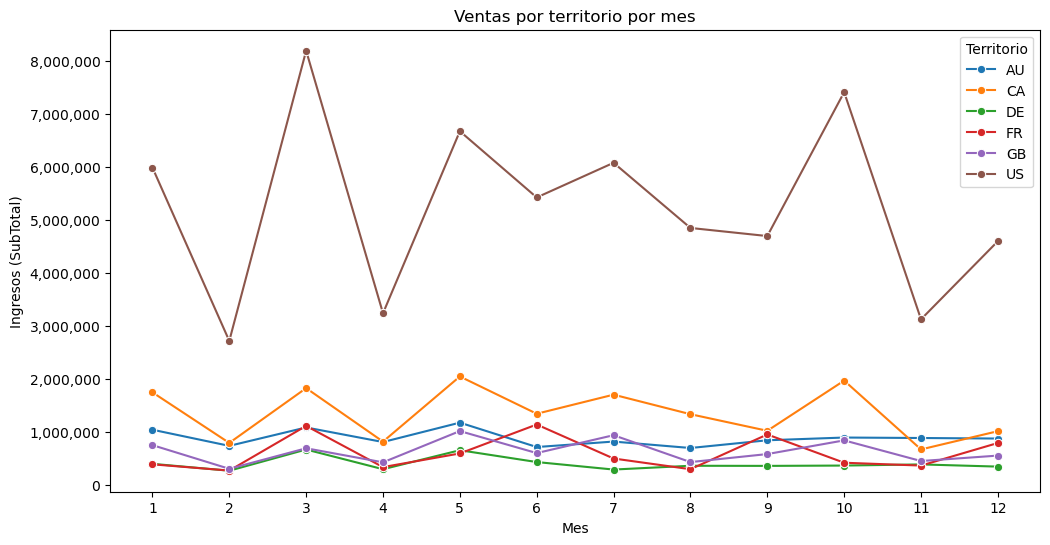

In [160]:
plt.figure(figsize=(12,6))
sns.lineplot(ventas_region_mes, x='Mes', y='sub_total', hue='country_region_code', marker='o')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Ventas por territorio por mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos (SubTotal)')
plt.xticks(range(1,13))  # Para mostrar los meses 1-12
plt.legend(title='Territorio')
plt.show()

In [161]:
ventas_año_region = ventas_region.groupby(['Año','country_region_code'])['sub_total'].sum().reset_index().sort_values('Año')
ventas_año_region['Año'] = ventas_año_region['Año'].astype(str)
ventas_año_region

,Año,country_region_code,sub_total
0,2011,AU,"1,532,156.31"
1,2011,CA,"1,874,382.42"
2,2011,DE,"246,860.54"
3,2011,FR,"213,817.76"
4,2011,GB,"362,888.62"
5,2011,US,"8,411,566.57"
10,2012,GB,"1,581,855.74"
9,2012,FR,"1,557,152.94"
11,2012,US,"21,849,381.26"
7,2012,CA,"5,861,057.47"


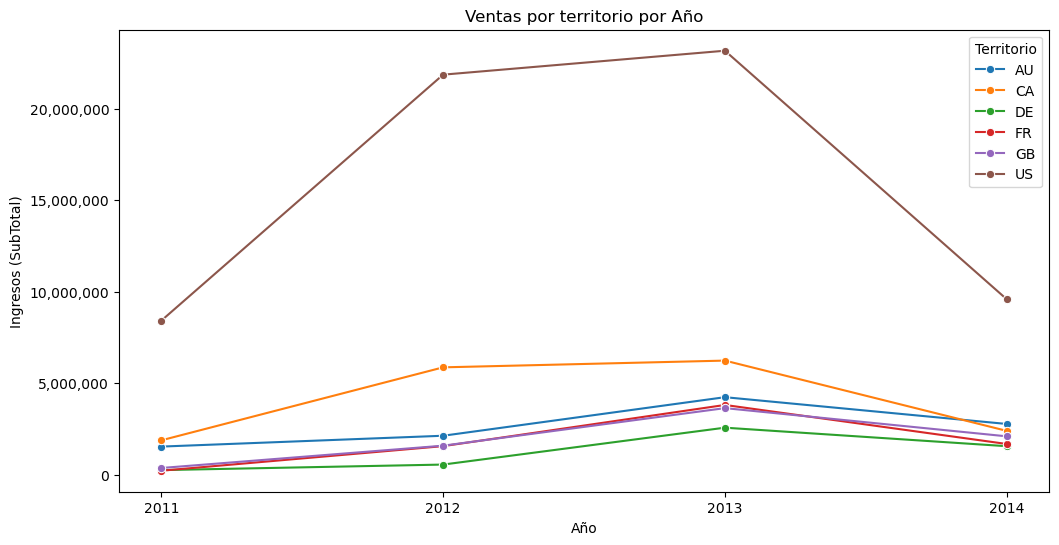

In [162]:
plt.figure(figsize=(12,6))
sns.lineplot(ventas_año_region, x='Año', y='sub_total', hue='country_region_code', marker='o')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Ventas por territorio por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (SubTotal)')
plt.legend(title='Territorio')
plt.show()

Por zona

In [163]:
ventas_mes_zona = ventas_region.groupby(['Mes','month_name','name'])['sub_total'].sum().reset_index().sort_values('Mes')
ventas_mes_zona

,Mes,month_name,name,sub_total
0,1,January,Australia,"1,048,159.52"
1,1,January,Canada,"1,752,531.72"
2,1,January,Central,"852,805.13"
3,1,January,France,"396,351.05"
4,1,January,Germany,"405,833.90"
...,...,...,...,...
114,12,December,Germany,"353,110.67"
115,12,December,Northeast,"476,396.72"
116,12,December,Northwest,"1,317,822.70"
117,12,December,Southeast,"595,986.90"


In [164]:
ventas_año_zona = ventas_region.groupby(['Año','name'])['sub_total'].sum().reset_index().sort_values('Año')
ventas_año_zona['Año'] = ventas_año_zona['Año'].astype(str)
ventas_año_zona

,Año,name,sub_total
0,2011,Australia,"1,532,156.31"
1,2011,Canada,"1,874,382.42"
2,2011,Central,"1,000,360.59"
3,2011,France,"213,817.76"
4,2011,Germany,"246,860.54"
5,2011,Northeast,"626,625.69"
6,2011,Northwest,"2,336,872.90"
7,2011,Southeast,"1,640,390.01"
8,2011,Southwest,"2,807,317.37"
9,2011,United Kingdom,"362,888.62"


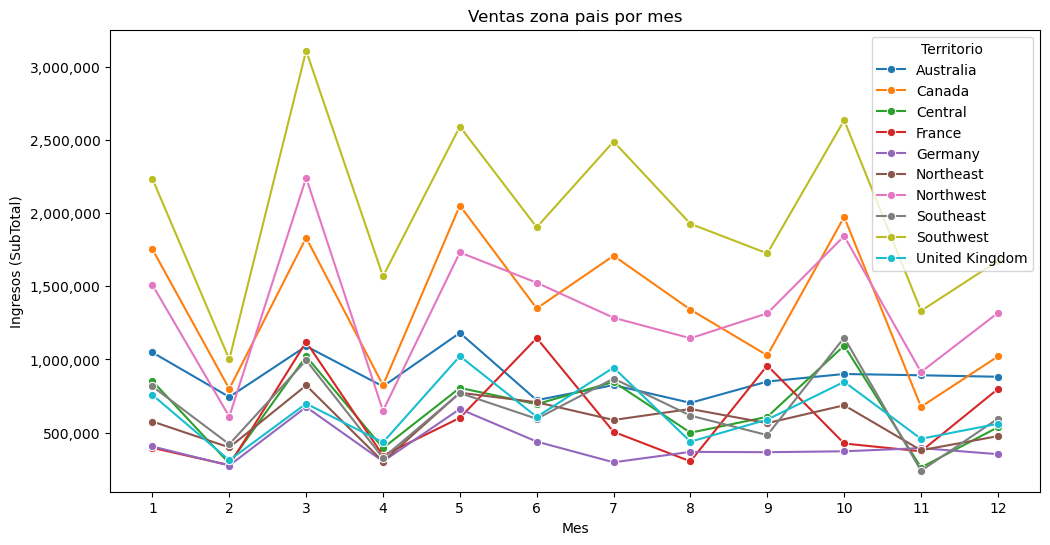

In [165]:
plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_mes_zona, x='Mes', y='sub_total', hue='name', marker='o')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Ventas zona pais por mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos (SubTotal)')
plt.xticks(range(1,13))  # Para mostrar los meses 1-12
plt.legend(title='Territorio')
plt.show()

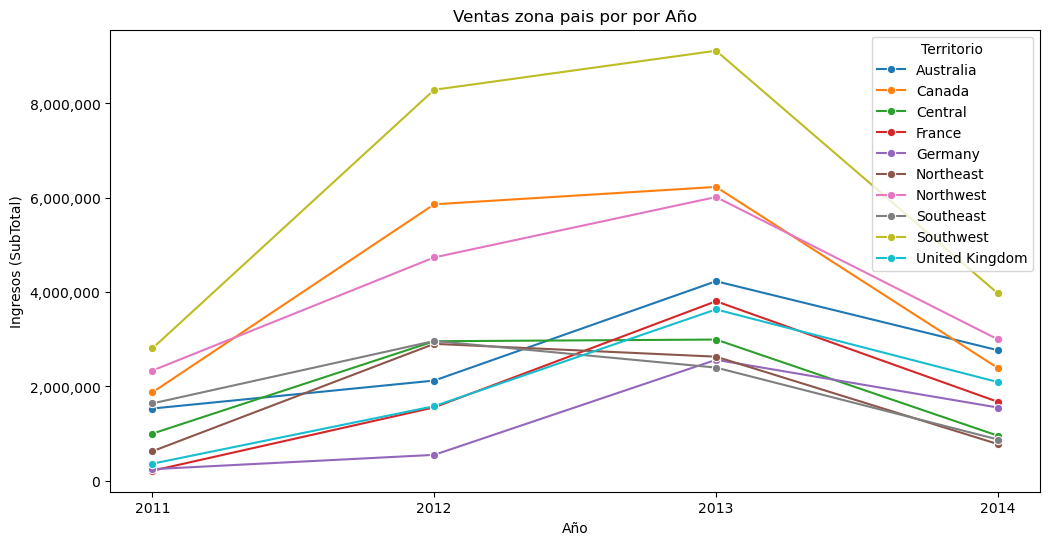

In [166]:
plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_año_zona, x='Año', y='sub_total', hue='name', marker='o')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Ventas zona pais por por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (SubTotal)')
plt.legend(title='Territorio')
plt.show()

¿Qué productos casi no se venden (ventas bajas)?

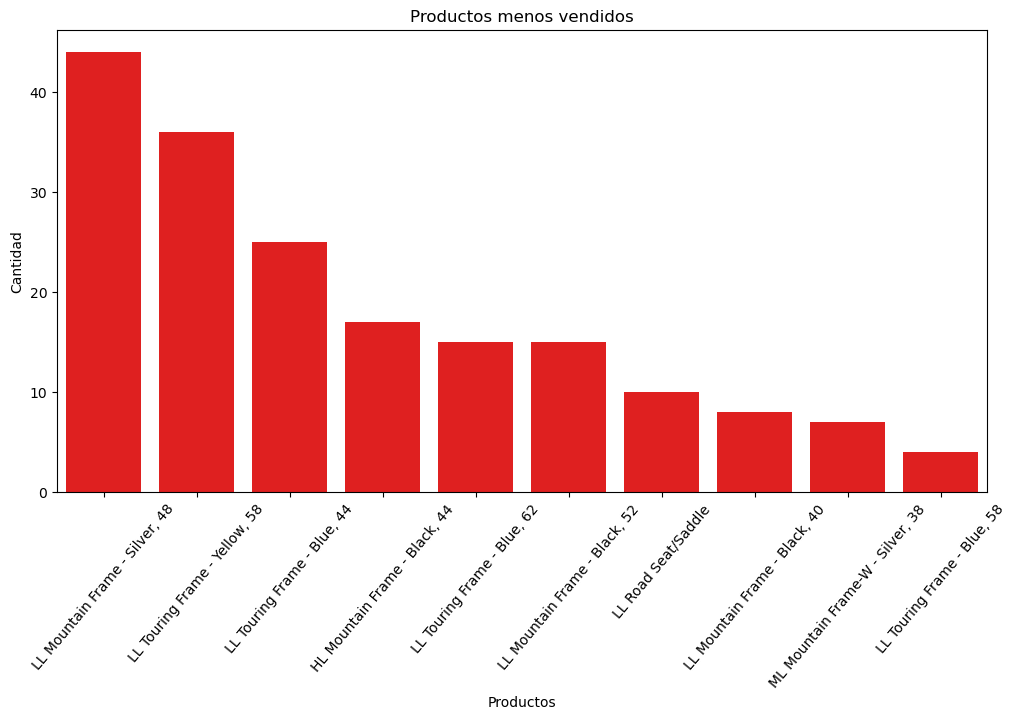

In [167]:
#para ver los menos vendidos.
productos_menos_vendidos = cant_productos_vendidos.tail(10)
#--
plt.figure(figsize=(12,6))
sns.barplot(data=productos_menos_vendidos, x='name', y='order_qty', color='red')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Productos menos vendidos')
plt.xlabel('Productos')
plt.ylabel('Cantidad')
plt.xticks(rotation=50)
plt.show()


¿Qué territorios tienen ventas altas pero baja rentabilidad?

In [168]:
ventas_generales_region = sales_territory.groupby('country_region_code')['sales_ytd'].sum().reset_index().sort_values('sales_ytd', ascending= False)
ventas_generales_region

,country_region_code,sales_ytd
5,US,"26,411,059.88"
1,CA,"6,771,829.14"
0,AU,"5,977,814.92"
4,GB,"5,012,905.37"
3,FR,"4,772,398.31"
2,DE,"3,805,202.35"


Primero lo vamos a ver por pais y luego por zona del pais.

In [169]:
rentabilidad = ganancia_por_orden.merge(order_header[['sales_order_id', 'territory_id']], on='sales_order_id', how='inner').merge(
                                   sales_territory[['territory_id', 'name',	'country_region_code']], on='territory_id', how='inner')

resumen_pais = rentabilidad.groupby('country_region_code').agg({'sub_total':'sum','ganancia_bruta':'sum'}).reset_index()
resumen_pais['margen_pct'] = (resumen_pais['ganancia_bruta'] / resumen_pais['sub_total']) * 100
resumen_pais.sort_values('margen_pct')


,country_region_code,sub_total,ganancia_bruta,margen_pct
1,CA,"16,355,770.46","404,316.41",2.47
5,US,"62,997,590.71","2,365,311.35",3.75
3,FR,"7,251,555.65","893,094.68",12.32
4,GB,"7,670,721.04","1,231,909.12",16.06
2,DE,"4,915,407.60","1,043,016.69",21.22
0,AU,"10,655,335.96","3,434,255.38",32.23


In [170]:
resumen_pais_zona = rentabilidad.groupby('name').agg({'sub_total':'sum','ganancia_bruta':'sum'}).reset_index()
resumen_pais_zona ['margen_pct'] = (resumen_pais_zona ['ganancia_bruta'] / resumen_pais_zona ['sub_total']) * 100
resumen_pais_zona.sort_values('margen_pct')

,name,sub_total,ganancia_bruta,margen_pct
5,Northeast,"6,939,374.48","-269,493.18",-3.88
7,Southeast,"7,879,655.07","-151,057.42",-1.92
2,Central,"7,909,009.01","-142,450.75",-1.80
1,Canada,"16,355,770.46","404,316.41",2.47
8,Southwest,"24,184,609.60","1,563,710.81",6.47
6,Northwest,"16,084,942.55","1,364,601.89",8.48
3,France,"7,251,555.65","893,094.68",12.32
9,United Kingdom,"7,670,721.04","1,231,909.12",16.06
4,Germany,"4,915,407.60","1,043,016.69",21.22
0,Australia,"10,655,335.96","3,434,255.38",32.23


In [171]:
product.to_csv("csv_limpios/product.csv", index=False, sep=';', decimal=',', encoding='utf-8')
p_category.to_csv("csv_limpios/p_category.csv", index=False, sep=';', decimal=',', encoding='utf-8')
p_sub_category.to_csv("csv_limpios/p_sub_category.csv", index=False, sep=';', decimal=',', encoding='utf-8')
order_detail.to_csv("csv_limpios/order_detail.csv", index=False, sep=';', decimal=',', encoding='utf-8')
order_header.to_csv("csv_limpios/order_header.csv", index=False, sep=';', decimal=',', encoding='utf-8')
sales_territory.to_csv("csv_limpios/sales_territory.csv", index=False, sep=';', decimal=',', encoding='utf-8')